## Decision Tree 

---

### Language : Python 3.8.8

---
### Coments of Decision Tree
* [Definition](#Definition)
* [Algorithm](#algorithm)
 * [Entropy](#Entropy)
 * [Gini Index](#Gini)
 * [Information Gain](#IG)
* [Advantages and Disadvantages of Decision Tree](#AD)
 * [Advantages](#Advantages)
 * [Disadvantages](#Disadvantages)
* [Confusion Matrix](#Confusion)
* [Code Applications on Data](#Application)
* [Regression Tree](#Regression)
* [Difference between classification tree and regression tree](#difference)


---
### Definition<a class="anchor" id="Definition"></a >
**Decision Trees (DTs)** are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.


---
### Algorithm<a class="Algorithm" id="Introduction"></a >

#### Entropy<a class="Entropy" id="Entropy"></a >

Entropy is a metric to measures the impurity, or uncertainty in data. It specifies randomness in data, controls how a decision tree decides to split the data, and affects how a decision tree draws its doundaries. The formula of entropy is

$$Entropy = \sum_{i=1}^c -P_i log_2 (P_i)$$
where $c$ is the total number of classes and $P_i$ is the probability of class $i$ in the node.

From the formular, we can know that the range of entropy is $[0, 1]$. The value of entropy should be as small as possible. 

#### Gini Index<a class="Gini" id="Gini"></a >

Gini index is used to determine the impurity or purity when building a decision tree in the classification and regression tree (CART) algorithm. The formula of Gini index is

$$Gini= 1 - \sum_{i=1}^c P_i^2$$
where c is the total number of classes and $P_i$ is the probability of class $i$ in the node.

Lower Gini index is better.

#### Information Gain (IG)<a class="IG" id="IG"></a >

Information gain is used to decide which feature to split at each step when building the decision tree. It measures the changes in entropy and is calculated for each split. A decision tree algorhtim would maximize the value of information gain, and thus, the split with the highest value of information gain will be selected. If a node $V$ is split into $V_l$ and $V_r$, the formula of information gain is

$$IG = Entropy(V)-w_l \times Entropy(V_l)+w_r \times Entropy(V_r)$$
where $w$ is the weight, that $w_l=\frac {|V_l|}{V}$ and $w_r=\frac {|V_r|}{V}$.


---
### Advantages and Disadvantages of Decision Tree<a class="AD" id="AD"></a >

#### Advantages<a class="Advantages" id="Advantages"></a >

* Simple to understand and to interpret. Trees can be visualised.
* Requires little data preparation.
* The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
* Able to handle both numerical and categorical data. 
* Able to handle multi-output problems.
* Uses a white box model. 
* Possible to validate a model using statistical tests.
* Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

#### Disadvantages<a class="Disadvantages" id="Disadvantages"></a >
* Decision-tree learners can create over-complex trees that do not generalise the data well. 
* Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. 
* They are not good at extrapolation.
* The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. 

---
### Confusion Matrix<a class="Confusion" id="Confusion"></a >

A confusion matrix is a technique for summarizing the performance of a classification algorithm.

Classification accuracy alone can be misleading if you have an unequal number of observations in each class or if you have more than two classes in your dataset.

Calculating a confusion matrix can give you a better idea of what your classification model is getting right and what types of errors it is making.

#### Classification Accuracy and its Limitations

Classification accuracy is the ratio of correct predictions to total predictions made.

$$\text{classification accuracy} = \frac{\text{correct predictions}}{\text{ total predictions}}$$

It is often presented as a percentage by multiplying the result by 100.

$$\text{classification accuracy} = \frac{\text{correct predictions}}{\text{total predictions} * 100}$$

Classification accuracy can also easily be turned into a misclassification rate or error rate by inverting the value, such as:

$$\text{error rate} = 1-(\frac{\text{correct predictions}}{\text{total predictions}}) * 100$$




Classification accuracy can hide the detail you need to diagnose the performance of your model. But thankfully we can tease apart this detail by using a confusion matrix.

* When your data has more than 2 classes. With 3 or more classes you may get a classification accuracy of 80%, but you don’t know if that is because all classes are being predicted equally well or whether one or two classes are being neglected by the model.

* When your data does not have an even number of classes. You may achieve accuracy of 90% or more, but this is not a good score if 90 records for every 100 belong to one class and you can achieve this score by always predicting the most common class value.

The confusion matrix shows the ways in which your classification model is confused when it makes predictions.


---
### Code and Application of Data<a class="Application" id="Application"></a >

#### Classification
Fristly, We will implement and train this model on the Personal Key Indicators of Heart Disease dataset, and get started by running the following code in the cell below.

In [7]:
# Import the necessaty libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

### Data Exploration

After importing the dataset, I simply plot the scatter plot to have an overall impression of the data distribution.

In [16]:
# Import Personal key indicators of heart disease dataset
df = pd.read_csv("palmer_penguins.csv")

# Remove the rows with NaN values from the dataset
df = df.dropna()
df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


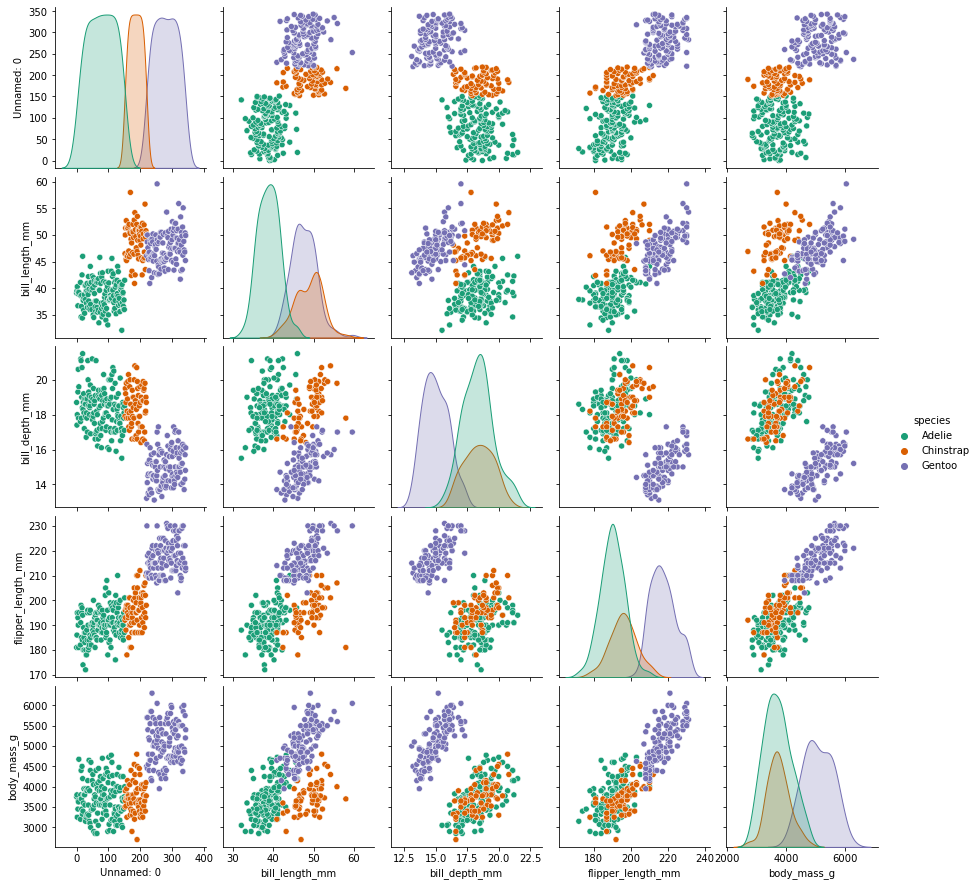

In [17]:
sns.pairplot(df, hue='species',palette='Dark2')

Text(0.5, 1.0, 'Penguins Data')

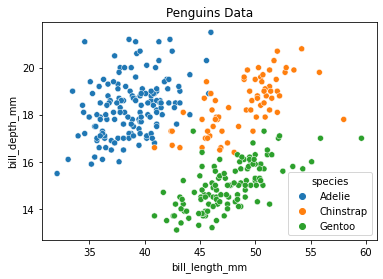

In [18]:
sns.scatterplot(data = df, x = "bill_length_mm", y = "bill_depth_mm", hue = 'species').set_title("Penguins Data")

From the scatter plot ,We can see that "bill_length_mm" and "bill_depth_mm" can separate the three pinguin species well. 

In [19]:
## covert features to numpy array
X = df[['bill_length_mm', 'bill_depth_mm']].to_numpy()
y = df['species'].to_numpy()

## change species label to numeric label
for i, label in enumerate(y):
    if label == "Adelie":
        y[i] = 0.0
    elif label == "Chinstrap":
        y[i] = 1.0
    else:
        y[i] = 2.0

In [20]:
y = y.astype(int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

### Train Decision Tree Model

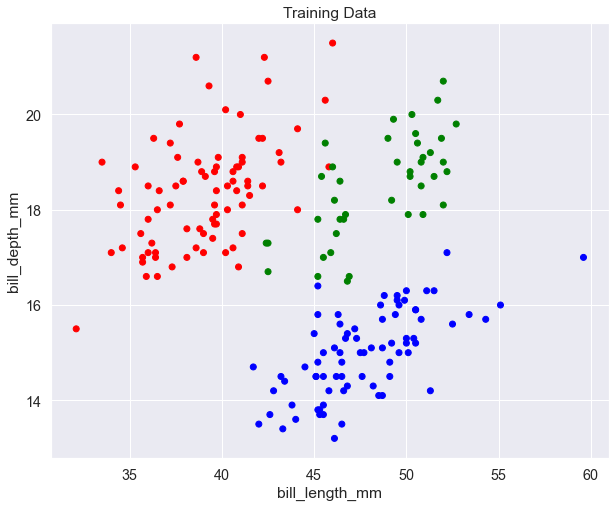

In [28]:
## calling the sklearn.model_selection.train_test_split()function

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 42)
# Scatter plot for the training data
c_train = ["red" if label == 0 else ("green" if label == 1 else "blue") for label in y_train]
c_test = ["red" if label == 0 else ("green" if label == 1 else "blue") for label in y_test]

plt.figure(figsize = (10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c = c_train)
plt.xlabel("bill_length_mm")
plt.ylabel("bill_depth_mm")
plt.title("Training Data")
plt.show()

## instantiate an instance of the sklearn.tree.Decision Tree Classifier model.

decision_tree = DecisionTreeClassifier(max_depth=15, random_state=42)
decision_tree.fit(X_train, y_train)

## Make list for features and labels
features = ["bill_length_mm", "bill_depth_mm"]
labels = ["Adelie", "Chinstrap", "Gentoo"]

In [29]:

## Build a text report showing the rules of the tree

tree_rules = export_text(decision_tree,
                         feature_names = features)
print(tree_rules)

|--- bill_depth_mm <= 16.45
|   |--- bill_length_mm <= 36.90
|   |   |--- class: 0
|   |--- bill_length_mm >  36.90
|   |   |--- class: 2
|--- bill_depth_mm >  16.45
|   |--- bill_length_mm <= 44.65
|   |   |--- bill_length_mm <= 42.35
|   |   |   |--- class: 0
|   |   |--- bill_length_mm >  42.35
|   |   |   |--- bill_depth_mm <= 17.65
|   |   |   |   |--- class: 1
|   |   |   |--- bill_depth_mm >  17.65
|   |   |   |   |--- class: 0
|   |--- bill_length_mm >  44.65
|   |   |--- bill_length_mm <= 56.15
|   |   |   |--- bill_depth_mm <= 21.10
|   |   |   |   |--- bill_length_mm <= 45.85
|   |   |   |   |   |--- bill_depth_mm <= 18.80
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- bill_depth_mm >  18.80
|   |   |   |   |   |   |--- bill_depth_mm <= 19.15
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- bill_depth_mm >  19.15
|   |   |   |   |   |   |   |--- bill_depth_mm <= 19.85
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   

#### Plot decision tree

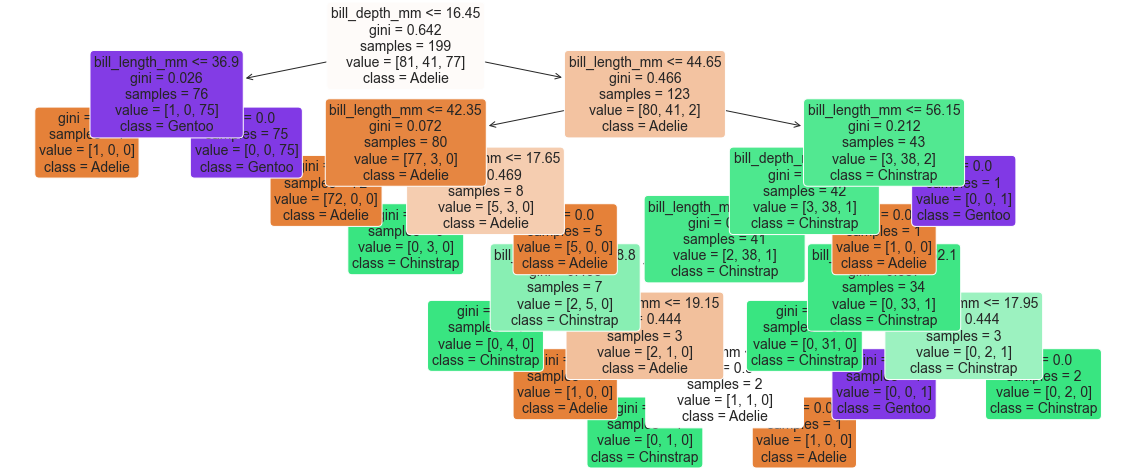

In [30]:
# using plot_tree
plt.figure(figsize = (20, 8))
a = tree.plot_tree(decision_tree,
                   feature_names = features,
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize = 14)
plt.show()

 ### Visualize the decision regions generated by our trained decision tree by running the following code cell

Text(0.5, 1.0, 'Decision Boundaries for Training Data')

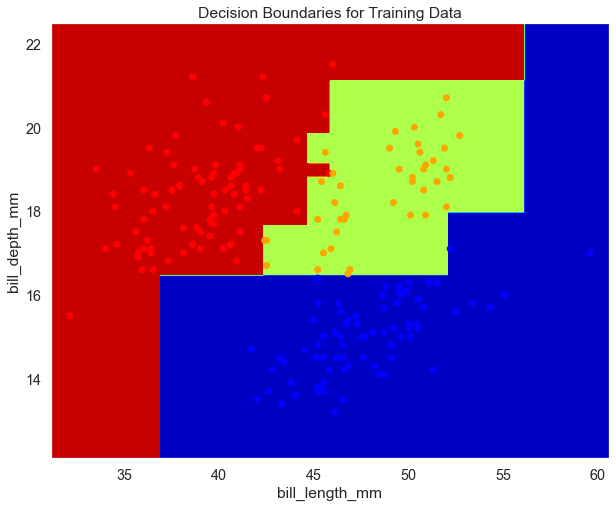

In [31]:
c_train = ["red" if label == 0 else ("orange" if label == 1 else "blue") for label in y_train]
c_test = ["red" if label == 0 else ("orange" if label == 1 else "blue") for label in y_test]

plot_step = 0.02

plt.figure(figsize = (10, 8))


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))



Z = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap = "jet_r") #blue and red coloring

plt.scatter(X_train[:, 0], X_train[:, 1], c = c_train)
plt.xlabel("bill_length_mm")
plt.ylabel("bill_depth_mm")
plt.title("Decision Boundaries for Training Data")

### Confusion Matix
We will evaluate our models performance on the testing data.

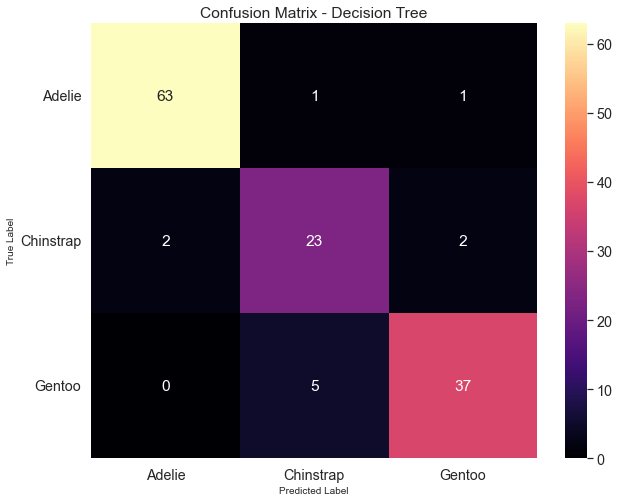

In [32]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Change the data type that can fit the usage of confusion matrix tool
y_test = y_test.astype("float64")

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)
# Plot confusion matrix using seaborn
plt.figure(figsize = (10, 8))
ax = plt.axes()
sns.set(font_scale = 1.3)

sns.heatmap(matrix_df,
            annot = True,
            fmt = "g",
            ax = ax,
            cmap = "magma")

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize = 10)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize = 10)
ax.set_yticklabels(labels, rotation = 0)
plt.show()

In [33]:
# Recall and the f1-score
print(metrics.classification_report(y_test, test_pred_decision_tree))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        65
         1.0       0.79      0.85      0.82        27
         2.0       0.93      0.88      0.90        42

    accuracy                           0.92       134
   macro avg       0.90      0.90      0.90       134
weighted avg       0.92      0.92      0.92       134



From the classification report, the performance of decision tree algorithm to classify the penguin species is very good, especially for the Adelie and the Gentoo penguins, since the accuracy, precision, recall, and $F_1$ scores are high (greater than $0.90$).

### Regression Model<a class="anchor" id="Regression"></a >

Decision trees can also be applied to regression problems, using the DecisionTreeRegressor class.

As in the classification setting, the fit method will take as argument arrays X and y, only that in this case y is expected to have floating point values instead of integer values:


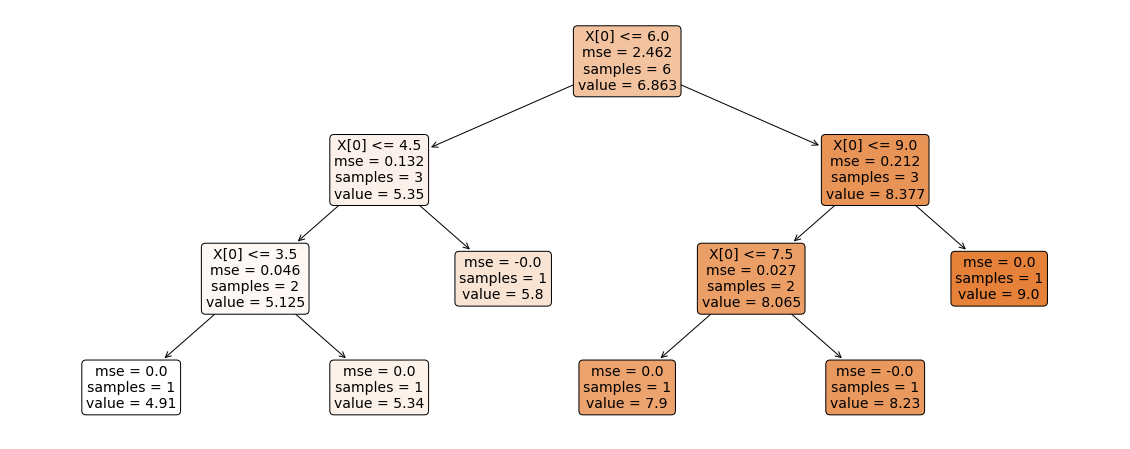

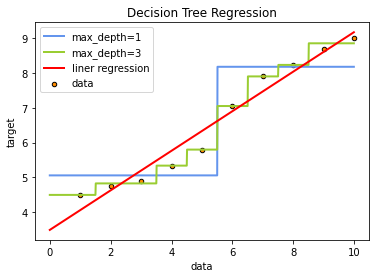

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model

# Data set
x = np.array(list(range(1, 11))).reshape(-1, 1)
y = np.array([4.50, 4.75, 4.91, 5.34, 5.80, 7.05, 7.90, 8.23, 8.70, 9.00]).ravel()

# Fit regression model
model1 = DecisionTreeRegressor(max_depth=1)
model2 = DecisionTreeRegressor(max_depth=3)
model3 = linear_model.LinearRegression()
model1.fit(x, y)
model2.fit(x, y)
model3.fit(x, y)

# Predict
x_test = np.arange(0.0, 10.0, 0.01)[:, np.newaxis]
y_1 = model1.predict(X_test)
y_2 = model2.predict(X_test)
y_3 = model3.predict(X_test)

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)
tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg.fit(x_train, y_train)

# visualize the regression tree
from sklearn import tree

plt.figure(figsize=(20,8))
a = tree.plot_tree(tree_reg,
                   feature_names = None,
                   class_names = None,
                   rounded = True,
                   filled = True,
                   fontsize = 14)

plt.show()

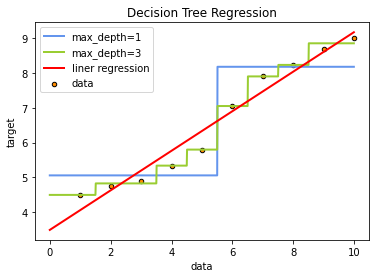

In [6]:
# Comparing the classiffication and regression
plt.figure()
plt.scatter(x, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=1", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=3", linewidth=2)
plt.plot(X_test, y_3, color='red', label='liner regression', linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### What is the difference between CART implementation of classification tree and regression tree?<a class="anchor" id="difference"></a >

* CART classification tree is a dichotomous recursive segmentation technique. The segmentation method uses a minimum distance-based Gini index estimation function to divide the current sample set into two sub-sample sets, such that each non-leaf node generated has two branches. Therefore, the decision tree generated by the CART algorithm is a binary tree with a simple structure.

* CART classification tree is a method of partitioning data into discrete classes by binary trees for target variables that are discrete in nature. The regression tree, on the other hand, is for continuous variables, and the regression tree is generated by selecting a certain value of the optimal segmentation feature, and then the data is divided into tree splits based on values greater or less than this value.
